In [ ]:
import torch

if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

NVIDIA GeForce RTX 3050 Laptop GPU


device(type='cuda')

In [5]:
from torchvision.models import resnet50, ResNet50_Weights, resnet18, ResNet18_Weights

# New weights with accuracy 80.858%
model = resnet18(weights=ResNet18_Weights)

# Download link for weights https://download.pytorch.org/models/resnet50-0676ba61.pth


c:\Users\35679\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


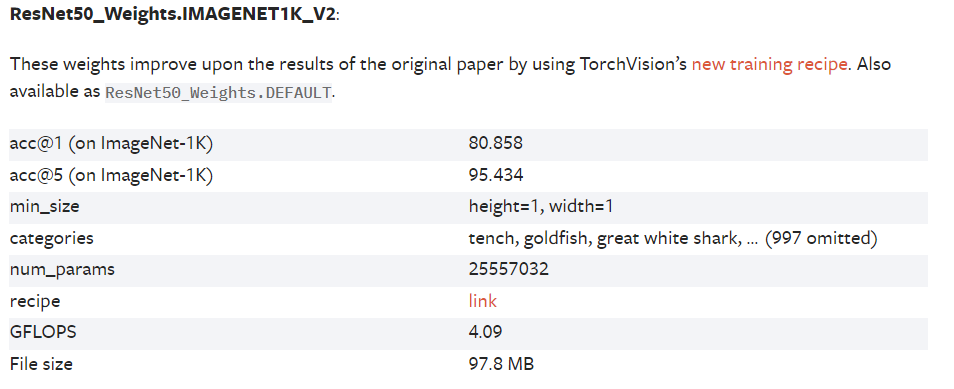

Step by step guide implementation of adaptive design

1.  Select the model (example ResNet, VGG)
2.  Download and visualise the weights in layers of the model. We know the amount of parameters, memory usage and number of mult-adds needed for each of the layers.
3.  Select the convolutional layers for adaptation
3.  Strategic/structered freezing of weight, manipulate weights in tensors by turning them to zero. (RESHAPE INSTEAD)

128 channels => 116 channels
128 x 56 x 56
116 x 56 x 56

    How do we freeze the weights that have the least impact on performance?
4.  Create function to adapt the amount of parameters that are changed, in order to have multple levels of adaptability. 
5.  Fine-tune (Is retraining needed?) May not be needed like in pruning.
6.  Evaluate performance (top 1% accuracy, top 5% accuarcy), memory usage and Mult-Adds 
7.  Plot performance vs memory usage and performance vs. mult-adds
8.  Select optimal adaptability levels such as (low, medium, high)


In [6]:
from torchstat import stat
import torchvision.models as models

model = models.resnet18()
stat(model, (3, 224, 224))

[MAdd]: AdaptiveAvgPool2d is not supported!
[Flops]: AdaptiveAvgPool2d is not supported!
[Memory]: AdaptiveAvgPool2d is not supported!
                 module name  input shape output shape      params memory(MB)             MAdd            Flops  MemRead(B)  MemWrite(B) duration[%]    MemR+W(B)
0                      conv1    3 224 224   64 112 112      9408.0       3.06    235,225,088.0    118,013,952.0    639744.0    3211264.0      36.70%    3851008.0
1                        bn1   64 112 112   64 112 112       128.0       3.06      3,211,264.0      1,605,632.0   3211776.0    3211264.0       4.12%    6423040.0
2                       relu   64 112 112   64 112 112         0.0       3.06        802,816.0        802,816.0   3211264.0    3211264.0       0.00%    6422528.0
3                    maxpool   64 112 112   64  56  56         0.0       0.77      1,605,632.0        802,816.0   3211264.0     802816.0       6.87%    4014080.0
4             layer1.0.conv1   64  56  56   64  56  56 

c:\Users\35679\anaconda3\lib\site-packages\torchstat\reporter.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(total_df)


In [63]:
# model.eval()
# summary(models.resnet50(), (3,256,256), device="cpu")

In [1]:
conv1_weights = model._modules['layer1'][0]._modules['conv1'].weight.data
# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

conv1_weights

NameError: name 'model' is not defined

In [62]:
weights = model.state_dict()['layer1.0.conv1.weight']


# print the weights
print(weights.shape)

torch.Size([64, 64, 1, 1])
